In [1]:
#Please execute this cell
import jupman;
from sciprog import draw_mat
from sciprog import draw_adj

# Midterm - Fri 16 Nov 2018

**Scientific Programming - Data Science Master @ University of Trento**

## [Download exercises and solution](_static/generated/sciprog-ds-2018-11-16-exam.zip)

## Introduction


### What to do

1) Download  `sciprog-ds-2018-11-16-exam.zip` and extract it <b>on your desktop</b>. Folder content should be like this:

```
sciprog-ds-2018-11-16-FIRSTNAME-LASTNAME-ID
    exam-2018-11-16.ipynb            
    jupman.py
    sciprog.py                
```

2) Rename `sciprog-ds-2018-11-16-FIRSTNAME-LASTNAME-ID` folder: put your name, lastname an id number, like `sciprog-ds-2018-11-16-john-doe-432432`

From now on, you will be editing the files in that folder. At the end of the exam, that is what will be evaluated.

3) Edit the files following the instructions in this worksheet for each exercise.
 
4) When done:

if you have unitn login:  zip and send to [examina.icts.unitn.it](http://examina.icts.unitn.it)
   
If you don't have unitn login: tell instructors and we will download your work manually


### A1 union

✪✪ When we talk about the _union_ of two graphs, we intend the graph having union of verteces of both graphs and having as edges the union of edges of both graphs. In this exercise, we have two graphs as list of lists with boolean edges. To simplify we suppose they have the same vertices but possibly different edges, and we want to calculate the union as a new graph.

For example, if we have a graph `ma` like this: 

In [2]:

ma =  [
            [True, False, False],
            [False, True, False],
            [True, False, False] 
      ]


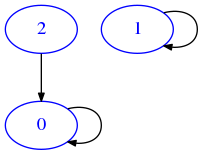

In [3]:
draw_mat(ma)

And another `mb` like this:

In [4]:
mb =  [
            [True, True, False],
            [False, False, True],
            [False, True, False]    
    
      ]

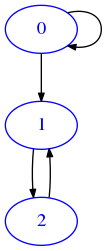

In [5]:
draw_mat(mb)

The result of calling `union(ma, mb)` will be the following: 

In [19]:

res = [[True, True, False], [False, True, True], [True, True, False]]


which will be displayed as

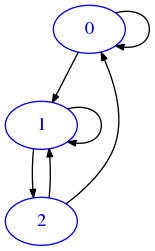

In [20]:
draw_mat(res)

So we get same verteces and edges from both `ma` and `mb`

In [6]:
def union(mata, matb):
    """ Takes two graphs represented as nxn matrices of lists of lists with boolean edges, 
        and RETURN a NEW matrix which is the union of both graphs
       
        if mata row number is different from matb, raises ValueError
    """
    
    
    if len(mata) != len(matb):
        raise ValueError("mata and matb have different row number a:%s b:%s!" % (len(mata), len(matb)))
                        
                         
    n = len(mata)
    
    ret = []
    for i in range(n):
        row = []
        ret.append(row)
        for j in range(n):
            row.append(mata[i][j] or matb[i][j])
    return ret
    

try:
    union([[False],[False]], [[False]])
    raise Exception("Shouldn't arrive here !")
except ValueError:
    "test passed"

try:
    union([[False]], [[False],[False]])
    raise Exception("Shouldn't arrive here !")
except ValueError:
    "test passed"
    
    
    
ma1 =  [
            [False]
        ]
mb1 =  [
            [False]
      ]

assert union(ma1, mb1) == [
                          [False]
                        ]

ma2 =  [
            [False]
      ]
mb2 =  [
            [True]
      ]

assert union(ma2, mb2) == [
                          [True]
                        ]

ma3 =  [
            [True]
      ]
mb3 =  [
            [False]
      ]

assert union(ma3, mb3) == [
                          [True]
                        ]


ma4 =  [
            [True]
      ]
mb4 =  [
            [True]
      ]

assert union(ma4, mb4) == [
                            [True]
                          ]
 
ma5 =  [
            [False, False, False],    
            [False, False, False],
            [False, False, False]        
    
       ]
mb5 =  [
            [True, False, True],
            [False, True, True],    
            [False, False, False]     
       ]

assert union(ma5, mb5) == [
                             [True, False, True],
                             [False, True, True],
                             [False, False, False]        
                          ]

ma6 =  [
            [True, False, True],
            [False, True, True],
            [False, False, False]        
      ]
mb6 =  [
            [False, False, False],    
            [False, False, False],
            [False, False, False]        
    
      ]

assert union(ma6, mb6) == [
                             [True, False, True],
                             [False, True, True],
                             [False, False, False]        
                          ]

ma7 =  [
            [True, False, False],
            [False, True, False],
            [True, False, False] 
      ]

mb7 =  [
            [True, True, False],
            [False, False, True],
            [False, True, False]    
    
      ]

assert union(ma7, mb7) == [
                            [True, True, False],
                            [False, True, True],
                            [True, True, False]

                        ]
    

## A2 surjective

✪✪ If we consider a graph as a nxn binary relation where the domain is the same as the codomain, such relation is called _surjective_ if every node is reached by _at least_ one edge. 

For example, `G1` here is surjective, because there is at least one edge reaching into each node (self-loops as in 0 node also count as incoming edges)

In [7]:
G1 = [
        [True, True, False, False],
        [False, False,  False, True],
        [False, True, True, False],
        [False, True, True, True],
    
     ]


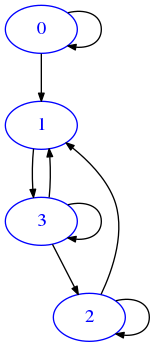

In [8]:
draw_mat(G1)

`G2` down here instead does not represent a surjective relation, as there is _at least_ one node ( `2` in our case) which does not have any incoming edge: 

In [9]:
G2 = [
        [True, True, False, False],
        [False, False,  False, True],
        [False, True, False, False],
        [False, True, False, False],
    
     ]


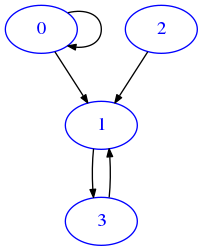

In [10]:
draw_mat(G2)

In [11]:
def surjective(mat): 
    """ RETURN True if provided graph mat as list of boolean lists is an 
        nxn surjective binary relation, otherwise return False
    """
    
    n = len(mat)
    c = 0   # number of incoming edges found
    for j in range(len(mat)):      # go column by column
        for i in range(len(mat)):  # go row by row
            if mat[i][j]: 
                c += 1      
                break    # as you find first incoming edge, increment c and stop search for that column
    return c == n
    
    
    
    
m1 =  [
         [False]
     ]

assert surjective(m1) == False


m2 =  [
         [True]
     ]

assert surjective(m2) == True

m3 =  [
         [True, False],
         [False, False],
     ]

assert surjective(m3) == False


m4 =  [
         [False, True],
         [False, False],
     ]

assert surjective(m4) == False

m5 =  [
         [False, False],
         [True, False],
     ]

assert surjective(m5) == False

m6 =  [
         [False, False],
         [False, True],
     ]

assert surjective(m6) == False


m7 =  [
         [True, False],
         [True, False],
     ]

assert surjective(m7) == False

m8 =  [
         [True, False],
         [False, True],
     ]

assert surjective(m8) == True


m9 =  [
         [True, True],
         [False, True],
     ]

assert surjective(m9) == True


m10 = [
        [True, True, False, False],
        [False, False,  False, True],
        [False, True, False, False],
        [False, True, False, False],
    
     ]
assert surjective(m10) == False

m11 = [
        [True, True, False, False],
        [False, False,  False, True],
        [False, True, True, False],
        [False, True, True, True],
    
     ]
assert surjective(m11) == True

### A3 ediff

✪✪✪  The _edge difference_ of two graphs `ediff(da,db)` is a graph with the edges of the first except the edges of the second. For simplicity, here we consider only graphs having the same verteces but possibly different edges. This time we will try operate on graphs represented as dictionaries of adjacency lists. 

For example, if we have

In [12]:
da =  {
          'a':['a','c'],
          'b':['b', 'c'],
          'c':['b','c']
        }

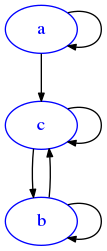

In [13]:
draw_adj(da)

and

In [14]:
db =  {
          'a':['c'],
          'b':['a','b', 'c'],
          'c':['a']
        }


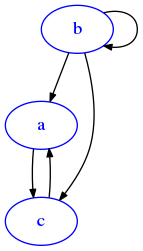

In [15]:
draw_adj(db)

The result of calling `ediff(da,db)` will be:

In [16]:
res = {
         'a':['a'],
         'b':[],
         'c':['b','c']
      }

Which can be shown as 

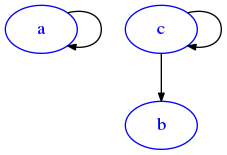

In [17]:
draw_adj(res)

In [18]:
def ediff(da,db):   
    """  Takes two graphs as dictionaries of adjacency lists da and db, and 
         RETURN a NEW graph as dictionary of adjacency lists, containing the same vertices of da, 
         and the edges of da except the edges of db. 
        
        - As order of elements within the adjacency lists, use the same order as found in da.
        - We assume all verteces in da and db are represented in the keys (even if they have 
          no outgoing edge), and that da and db have the same keys
          
          EXAMPLE: 
          
            da =  {
                      'a':['a','c'],
                      'b':['b', 'c'],
                      'c':['b','c']
                    }

            db =  {
                      'a':['c'],
                      'b':['a','b', 'c'],
                      'c':['a']
                    }

            assert ediff(da, db) == {
                                       'a':['a'],
                                       'b':[],
                                       'c':['b','c']
                                     }          
    
    """
    
        
    ret = {}
    for key in da:
        ret[key] = []
        for target in da[key]:   
            # not efficient but works for us 
            # using sets would be better, see https://stackoverflow.com/a/6486483
            if target not in db[key]:    
                ret[key].append(target)
    return ret
    

    

    
da1 =  {
          'a': []
       }
db1 =  {
          'a': []
       }


assert ediff(da1, db1) ==   {
                             'a': []
                           }

da2 =  {
          'a': []
       }
        
db2 =  {
          'a': ['a']
       }

assert ediff(da2, db2) == {
                            'a': []
                         }

da3 =  {
         'a': ['a']
       }
db3 =  {
          'a': []
       }

assert ediff(da3, db3) ==   {
                              'a': ['a']
                           }


da4 =  {
           'a': ['a']
       }
db4 =  {
           'a': ['a']
       }

assert ediff(da4, db4) == {
                           'a': []
                          } 
da5 =  {
          'a':['b'],
          'b':[]
        }
db5 =  {
          'a':['b'],
          'b':[]
       }

assert ediff(da5, db5) == {
                          'a':[],
                          'b':[]    
                        }

da6 =  {
          'a':['b'],
          'b':[]
        }
db6 =  {
          'a':[],
          'b':[]    
        }

assert ediff(da6, db6) == {
                           'a':['b'],
                           'b':[]
                         }

da7 =  {
          'a':['a','b'],
          'b':[]
        }
db7 =  {
          'a':['a'],
          'b':[]    
        }

assert ediff(da7, db7) == {
                           'a':['b'],
                           'b':[]
                         }


da8 =  {
          'a':['a','b'],
          'b':['a']
        }
db8 =  {
          'a':['a'],
          'b':['b']    
        }

assert ediff(da8, db8) == {
                           'a':['b'],
                           'b':['a']
                         }

da9 =  {
          'a':['a','c'],
          'b':['b', 'c'],
          'c':['b','c']
        }

db9 =  {
          'a':['c'],
          'b':['a','b', 'c'],
          'c':['a']
        }

assert ediff(da9, db9) == {
                           'a':['a'],
                           'b':[],
                           'c':['b','c']
                         }
